In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


<h1>Step 1: Exploratory Data Analysis <h1>

In [3]:
# Create dataframe of the csv files
training_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Find and fill any missing values
print(training_df.isna().sum())
print(test_df.isna().sum())

Index        0
Sentiment    0
Text         0
dtype: int64
Index        0
Sentiment    0
Text         0
dtype: int64


In [4]:
# Find the size of each of the datasets and what it includes
print(training_df.head())
print(test_df.head())

print("Size of training dataset " + str(training_df.size))
print("Size of test dataset " + str(test_df.size))

   Index  Sentiment                                               Text
0      0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      1          0  is upset that he can't update his Facebook by ...
2      2          0  @Kenichan I dived many times for the ball. Man...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  @nationwideclass no, it's not behaving at all....
   Index  Sentiment                                               Text
0      0          1  @stellargirl I loooooooovvvvvveee my Kindle2. ...
1      1          1  Reading my kindle2...  Love it... Lee childs i...
2      2          1  Ok, first assesment of the #kindle2 ...it fuck...
3      3          1  @kenburbary You'll love your Kindle2. I've had...
4      4          1  @mikefish  Fair enough. But i have the Kindle2...
Size of training dataset 3145725
Size of test dataset 1077


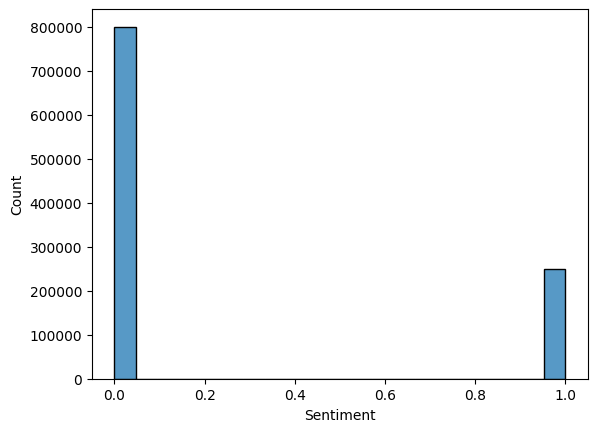

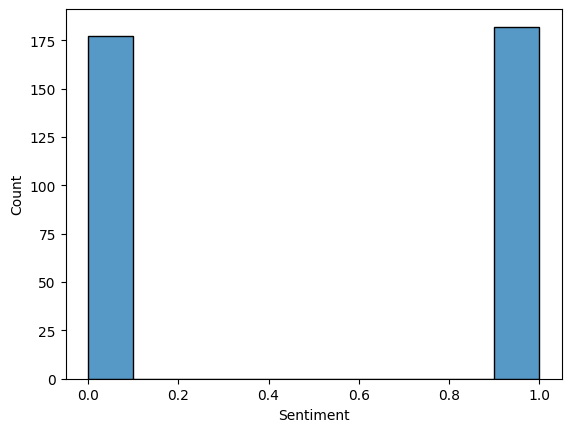

In [5]:
# See distribution of sentiment scores in the dataset
training_fig = sns.histplot(data=training_df['Sentiment'])
plt.show(training_fig)
test_fig = sns.histplot(data=test_df['Sentiment'])
plt.show(test_fig)

<h1> Step 2: Text Preprocessing <h1>

Preprocess the discussion texts

1. Change Case: Converting all upper-case letters into lower-case
2. Tokenization
3. Remove Special Characters
4. Remove Digital Numbers
5. Lemmatization: Lemmatization considers the context and converts the word to its meaningful base form


In [6]:
# Because there is a lot of data -> need to take sample from the dataframe so my laptop does not catch fire
training_df = training_df.sample(frac = .01)
print(training_df.size)

31458


In [7]:
# 1. Change Case: Converting all upper-case letters into lower-case
training_sent_temp = training_df["Text"]
test_sent_temp = test_df["Text"]

temp = []
for item in training_sent_temp:
    res = item.lower()
    temp.append(res)
print(temp[0])
training_sent_temp = temp

temp_1 =[]
for item in test_sent_temp:
    res = item.lower()
    temp_1.append(res)
print(temp_1[0])
test_sent_temp = temp_1


@chrisb68 hahaha if thats waht ray ses i beleive him. 
@stellargirl i loooooooovvvvvveee my kindle2. not that the dx is cool, but the 2 is fantastic in its own right.


In [8]:
# 2. Tokenization
temp = []
for item in training_sent_temp:
    res = item.split()
    temp.append(res)
print(temp[0])

temp_1 = []
for item in test_sent_temp:
    res = item.split()
    temp_1.append(res)
print(temp_1[0])

['@chrisb68', 'hahaha', 'if', 'thats', 'waht', 'ray', 'ses', 'i', 'beleive', 'him.']
['@stellargirl', 'i', 'loooooooovvvvvveee', 'my', 'kindle2.', 'not', 'that', 'the', 'dx', 'is', 'cool,', 'but', 'the', '2', 'is', 'fantastic', 'in', 'its', 'own', 'right.']


In [9]:
import re

In [10]:
# 3. Remove Special Characters
temp2 = []
for item in temp:
    res = []
    for x in item:
        if '@' in x:
            normal_string = ""
        else:
            normal_string =re.sub("[^A-Z]", "", x,0,re.IGNORECASE)
        res.append(normal_string)
    temp2.append(res)
temp = temp2
print(temp[0])

temp_2 = []
for item in temp_1:
    res = []
    for x in item:
        if '@' in x:
            normal_string = ""
        else:
            normal_string =re.sub("[^A-Z]", "", x,0,re.IGNORECASE)
        res.append(normal_string)
    temp_2.append(res)
temp_1 = temp_2
print(temp_1[0])

['', 'hahaha', 'if', 'thats', 'waht', 'ray', 'ses', 'i', 'beleive', 'him']
['', 'i', 'loooooooovvvvvveee', 'my', 'kindle', 'not', 'that', 'the', 'dx', 'is', 'cool', 'but', 'the', '', 'is', 'fantastic', 'in', 'its', 'own', 'right']


In [11]:
# 4. Remove Digital Numbers
temp2 = []
for item in temp:
    res = []
    for x in item:
        result = re.sub(r'[0-9]+', '', x)
        res.append(result)
    temp2.append(res)
print(temp2[0])

temp_2 = []
for item in temp_1:
    res = []
    for x in item:
        result = re.sub(r'[0-9]+', '', x)
        res.append(result)
    temp_2.append(res)
print(temp_2[0])

['', 'hahaha', 'if', 'thats', 'waht', 'ray', 'ses', 'i', 'beleive', 'him']
['', 'i', 'loooooooovvvvvveee', 'my', 'kindle', 'not', 'that', 'the', 'dx', 'is', 'cool', 'but', 'the', '', 'is', 'fantastic', 'in', 'its', 'own', 'right']


In [12]:
import spacy

In [13]:
# 5. Lemmatization: Lemmatization considers the context and converts the word to its meaningful base form
nlp = spacy.load("en_core_web_sm")
temp3 = []
for item in temp2:
    res = []
    for x in item:
        doc = nlp(x)
        for word in doc:
            res.append(word.lemma_)
    temp3.append(res)
print(temp3[0])

temp4 = []
for item in temp_2:
    res = []
    for x in item:
        doc = nlp(x)
        for word in doc:
            res.append(word.lemma_)
    temp4.append(res)
print(temp4[0])

['hahaha', 'if', 'that', 's', 'waht', 'ray', 'se', 'I', 'beleive', 'he']
['I', 'loooooooovvvvvveee', 'my', 'kindle', 'not', 'that', 'the', 'dx', 'be', 'cool', 'but', 'the', 'be', 'fantastic', 'in', 'its', 'own', 'right']


In [14]:
# combine into one string
training_sentiment_final = []
for item in temp3:
    res = " ".join(item).lower()
    training_sentiment_final.append(res)
print(training_sentiment_final[0])

test_sentiment_final = []
for item in temp4:
    res = " ".join(item).lower()
    test_sentiment_final.append(res)
print(test_sentiment_final[0])

hahaha if that s waht ray se i beleive he
i loooooooovvvvvveee my kindle not that the dx be cool but the be fantastic in its own right


<h1>Step 3: Linguistic Feature Extraction </h1>

1. Bag of Words
2. TF*IDF
3. Word2Vec

In [15]:
# 1. Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(temp3)
vectorizer.vocabulary_
X_bag_of_words = vectorizer.transform(temp3)
X_bag_of_words.toarray()

vectorizer = CountVectorizer()
docs2 = np.array([test_sentiment_final])
bag2 = vectorizer.fit_transform(docs2.ravel())
print(vectorizer.vocabulary_)
print(bag2.toarray())

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
x = bag.toarray()
x_train, x_test, y_train, y_test = train_test_split(x)
#
# Create an instance of LogisticRegression classifier
#
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
#
# Fit the model
#
lr.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = lr.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))

ValueError: not enough values to unpack (expected 4, got 2)